<a href="https://www.kaggle.com/code/ahmeterdemyenay/titanic-eda?scriptVersionId=193455255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION

- The Titanic was a British passenger liner that sank on its maiden voyage from Southampton to New York City after hitting an iceberg on April 14, 1912. Of the over 2,200 passengers and crew aboard, more than 1,500 lost their lives. The ship was considered "unsinkable" due to its advanced design and safety features. The tragedy led to significant changes in maritime safety regulations. The Titanic's story remains one of the most famous maritime disasters in history.

<font color = 'yellow' >
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Univariate Variable Analysis](#3)
    * [Categorical Variable](#4)
    * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between SibSp / Parch / Age / Fare / Survived](#12)
    * [SibSp / Survived](#13)
    * [Parch / Survived](#14)
    * [Pclass / Survived](#15)
    * [Age / Survived](#16)
    * [Pclass / Survived / Age](#17)
    * [Embarked / Sex / Pclass / Survived](#18)
    * [Embarked / Sex / Fare / Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name / Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Load and Check Data
<a id = "1"></a>

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"] # We saved test_PassengerId because we will use it later. Since we will perform many operations on test_df, we don't want to lose the original PassengerId. Therefore, we assigned it to a variable to use in later stages.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Variable Description
<a id = "2"></a>


1. PassengerId: A unique identifier for each passenger.
1. Survived: Indicates whether the passenger survived (1) or not (0).
1. Pclass: The passenger's class on the ship, with 1 being the highest (first class), 2 the middle (second class), and 3 the lowest (third class).
1. Name: The full name of the passenger.
1. Sex: The gender of the passenger (male or female).
1. Age: The age of the passenger.
1. SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
1. Parch: The number of parents or children the passenger had aboard the Titanic.
1. Ticket: The ticket number assigned to the passenger.
1. Fare: The fare the passenger paid for the ticket.
1. Cabin: The cabin number assigned to the passenger.
1. Embarked: The port where the passenger boarded the Titanic. (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare, Age
* int64(5)  : PassengerId, Survived, Pclass, SibSp, Parch
* object(5) : Name, Sex, Ticket, Cabin, Embarked

# 3. Univariate Variable Analysis
<a id = "3"></a><br>
* Categorical Variable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, and Parch
* Numerical Variable  : Age, PassengerId, and Fare

## Categorical Variable:
<a id = "4"></a>

In [8]:
def bar_plot(variable):
    """
        input: variable ex.: "Sex"
        output: bar plot & value count
    """
    
    # get feature
    var = train_df[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(varValue)

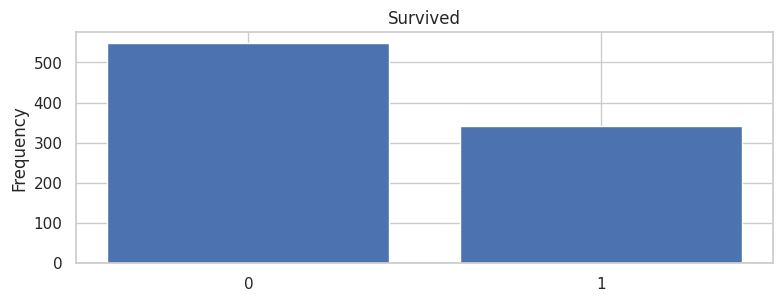

Survived
0    549
1    342
Name: count, dtype: int64


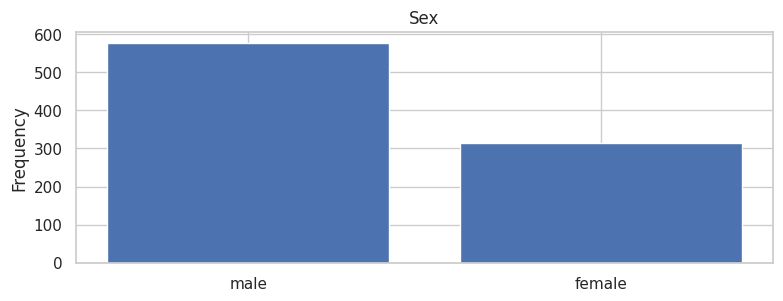

Sex
male      577
female    314
Name: count, dtype: int64


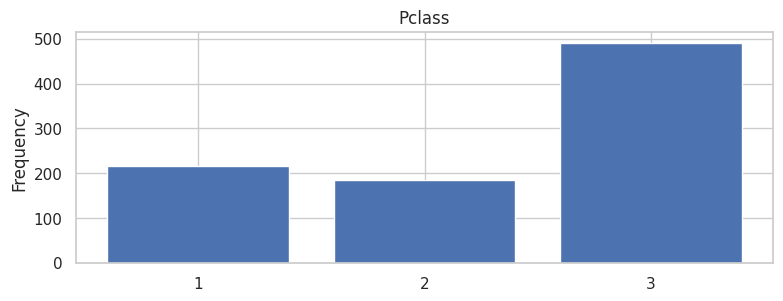

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


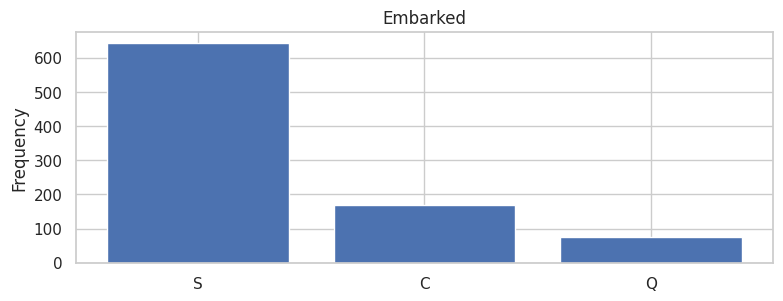

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


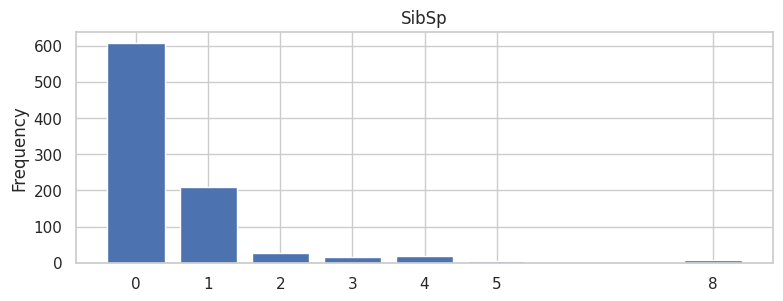

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


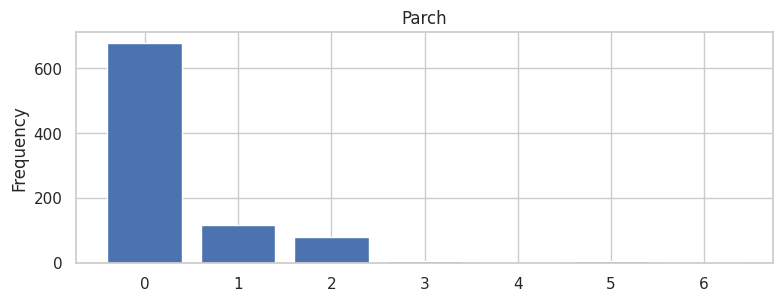

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

1. Survived:
The 'Survived' variable shows a clear imbalance with 549 non-survivors and 342 survivors. This imbalance should be considered in any analysis or predictive modeling to avoid bias towards the majority class.

2. Sex:
The dataset contains 577 males and 314 females. The higher number of males could affect survival rate analysis and should be factored into gender-based studies.

3. Pclass:
Most passengers are in the 3rd class (491), followed by 1st class (216), and then 2nd class (184). The distribution suggests socioeconomic status may play a role in survival analysis.

4. Embarked:
The majority of passengers embarked from port 'S' (644), followed by 'C' (168) and 'Q' (77). This distribution can help analyze regional differences in passenger demographics.

5. SibSp:
Most passengers traveled alone with no siblings/spouses (608), and a smaller number had 1 sibling/spouse (209). Few passengers traveled with more than one sibling or spouse, suggesting smaller family groups.

6. Parch:
A majority of passengers did not travel with parents/children (678), and a smaller number had 1 parent/child (118). Very few passengers had larger family groups, indicating mostly individual or small family travel groups.

In [10]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64 

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64 

Ticket
1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
           

1. Cabin:
The 'Cabin' variable is highly unique, with 147 distinct cabin labels. The most common cabins (e.g., B96 B98, G6) appear only 4 times, indicating a sparse and diverse distribution of cabin assignments among passengers.

2. Name:
Each passenger in the dataset has a unique name, as evidenced by 891 distinct names. This uniqueness suggests that the 'Name' variable is not suitable for categorical analysis or predictive modeling.

3. Ticket:
The 'Ticket' variable shows a high level of diversity with 681 unique ticket numbers. The most frequently occurring tickets (e.g., 347082, CA. 2343) appear only 7 times, indicating that ticket numbers are mostly unique and may not provide significant insights into groupings or patterns among passengers.

## Numerical Variable:
<a id = "5"></a>

In [11]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

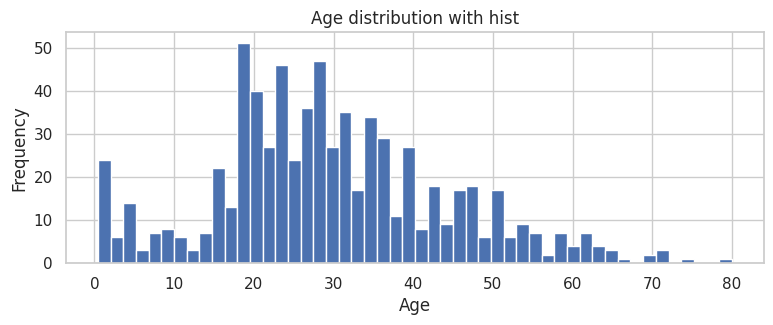

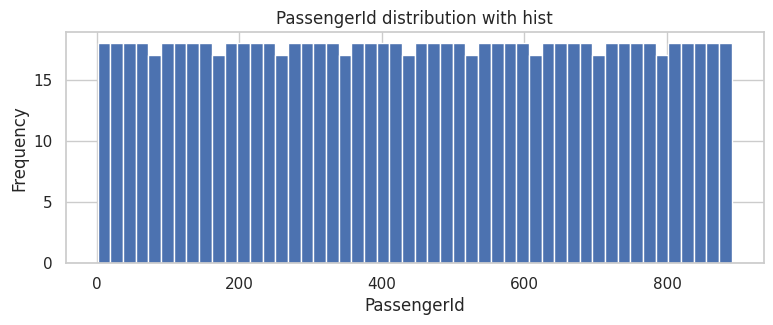

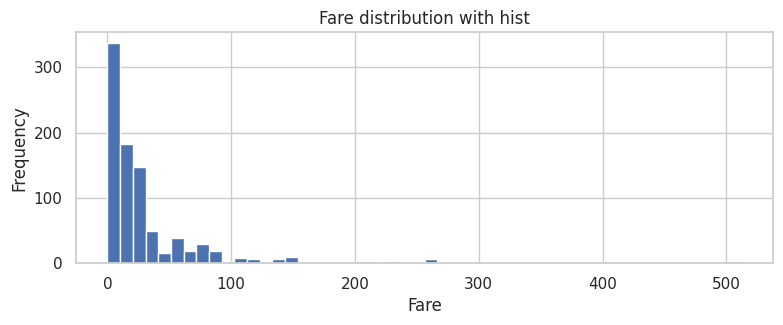

In [12]:
numericVar = ["Age", "PassengerId", "Fare"]
for n in numericVar:
    plot_hist(n)

1. Age Distribution:
The age distribution shows a right-skewed pattern with the majority of passengers aged between 20 and 30. This indicates that the Titanic had a relatively young passenger demographic, with fewer passengers in older age groups.

2. PassengerId Distribution:
The 'PassengerId' distribution is uniform, with each ID occurring with equal frequency. This suggests that 'PassengerId' is simply an identifier and does not provide any specific insights about the passengers themselves.

3. Fare Distribution:
The fare distribution is highly right-skewed, with most fares clustering at the lower end of the spectrum. A small number of outliers paid significantly higher fares, reflecting a wide range of ticket prices, likely corresponding to different travel classes and accommodations. There is a notable outlier with a fare close to 250 units, which indicates a significantly higher payment. This high fare could be due to a passenger traveling in a luxury cabin, booking multiple tickets together, or receiving special accommodations and services.

# 4. Basic Data Analysis
<a id = "6"></a>
This analysis will investigate the relationships between the survival rate (Survived) and various passenger attributes: passenger class (Pclass), gender (Sex), number of siblings/spouses aboard (SibSp), and number of parents/children aboard (Parch). This will help identify key factors that influenced survival rates on the Titanic. For example, we will explore whether passengers in higher classes had higher survival rates, if women had a better chance of survival than men, and how family size impacted the likelihood of surviving the disaster.
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [13]:
# Pclass vs Survived

train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass - Survived
- 1st Class (0.629630): Passengers in the 1st class had a high survival rate of approximately 62.96%, indicating a significant advantage for higher-class passengers.
- 2nd Class (0.472826): Passengers in the 2nd class had a moderate survival rate of about 47.28%, lower than the 1st class but still notable.
- 3rd Class (0.242363): Passengers in the 3rd class had the lowest survival rate at around 24.24%, showing a clear disadvantage for lower-class passengers.

In [14]:
# Sex vs Survived

train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex - Survived
- Female (0.742038): Females had a high survival rate of approximately 74.20%, reflecting the prioritization of women during the evacuation.
- Male (0.188908): Males had a significantly lower survival rate of about 18.89%, indicating a lower priority during rescue efforts.

In [15]:
# SibSp vs Survived

train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp - Survived
- 1 Sibling/Spouse (0.535885): Passengers with 1 sibling or spouse had a survival rate of approximately 53.59%, suggesting a moderate advantage.
- 2 Siblings/Spouses (0.464286): Those with 2 siblings or spouses had a survival rate of about 46.43%, showing a slight decrease compared to those with 1.
- 0 Siblings/Spouses (0.345395): Passengers with no siblings or spouses had a survival rate of around 34.54%.
- 3 Siblings/Spouses (0.250000): Passengers with 3 siblings or spouses had a survival rate of 25.00%.
- 4 Siblings/Spouses (0.166667): Those with 4 siblings or spouses had a survival rate of approximately 16.67%.
- 5 Siblings/Spouses (0.000000): Passengers with 5 siblings or spouses had no survivors.
- 8 Siblings/Spouses (0.000000): Similarly, those with 8 siblings or spouses had no survivors, indicating a significant disadvantage for large family groups.

In [16]:
# Parch vs Survived

train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch - Survived
- 3 Parents/Children (0.600000): Passengers with 3 parents or children had a high survival rate of 60.00%.
- 1 Parent/Child (0.550847): Those with 1 parent or child had a survival rate of approximately 55.08%.
- 2 Parents/Children (0.500000): Passengers with 2 parents or children had a survival rate of 50.00%.
- 0 Parents/Children (0.343658): Passengers with no parents or children had a survival rate of about 34.37%.
- 5 Parents/Children (0.200000): Those with 5 parents or children had a survival rate of 20.00%.
- 4 Parents/Children (0.000000): Passengers with 4 parents or children had no survivors.
- 6 Parents/Children (0.000000): Similarly, those with 6 parents or children also had no survivors, highlighting the difficulty of surviving with large family groups.

# 5. Outlier Detection
<a id = "7"></a>

Outlier detection is a crucial step in data analysis to identify and handle data points that significantly differ from the majority of the dataset. These outliers can result from various factors, including data entry errors, measurement errors, or genuine but rare variations in the data. Detecting and addressing outliers is essential because they can skew statistical analyses and model training, leading to inaccurate results.

- Common Methods for Outlier Detection:
    1. Visual Inspection:

        Box Plots: Visualize the distribution of data and highlight outliers beyond the whiskers.
        
        Scatter Plots: Identify outliers in bivariate data by plotting relationships between two variables.
    2. Statistical Methods:

        Z-Score: Measures how many standard deviations a data point is from the mean. Data points with a Z-score above 3 or below -3 are often considered outliers.
        
        IQR (Interquartile Range): Data points beyond 1.5 times the IQR above the third quartile or below the first quartile are considered outliers.
    3. Machine Learning Algorithms:

        Isolation Forest: Anomaly detection algorithm that isolates observations by randomly selecting a feature and then randomly selecting a split value.
        
        DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Identifies outliers as points that do not belong to any cluster due to their low density.
- Handling Outliers:
    * Remove Outliers: If outliers are due to errors, they can be removed to prevent skewed analysis.
    * Transform Data: Apply transformations (e.g., log transformation) to reduce the impact of outliers.
    * Use Robust Methods: Employ statistical methods and machine learning models that are less sensitive to outliers.

By effectively detecting and handling outliers, the integrity and accuracy of data analysis and predictive modeling can be significantly improved.

In [17]:
def detecet_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [18]:
train_df.loc[detecet_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
# Drop outliers

train_df = train_df.drop(detecet_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

# 6. Missing Value 
<a id = "8"></a>

In [20]:
# Important Note:
# This concatenation should only be done once. If the code is executed multiple times without proper checks, 
# the test dataset will be appended to the training dataset repeatedly, leading to duplicated data. 
# This can cause significant issues in data analysis and modeling, such as data leakage, where the model gets 
# access to information from the test set during training, leading to over-optimistic performance estimates.

train_df_len = len(train_df)
train_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)
train_df_len

881

## Find Missing Value
<a id = "9"></a>

In [21]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

## Fill Missing Value
<a id = "10"></a>

* Embarked has 2 missing value,
* Fare has only 1.

In [23]:
# Handling Missing 'Embarked' Values
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


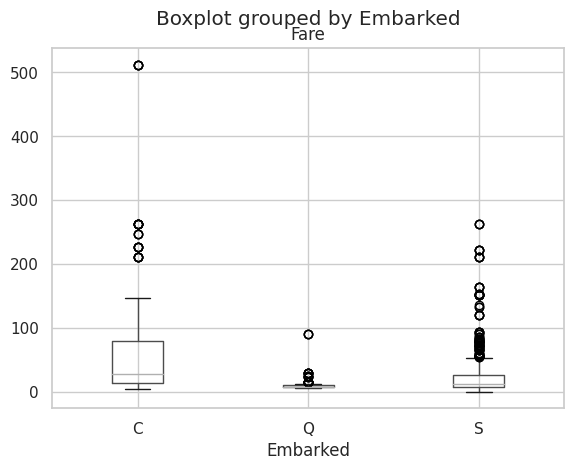

In [24]:
train_df.boxplot(column = "Fare", by = "Embarked")
plt.show()

* To fill the missing 'Embarked' values, a box plot of 'Fare' grouped by 'Embarked' locations (C, Q, S) was analyzed. The box plot revealed that the median fare for 'C' (Cherbourg) was closest to 80, the fare of passengers with missing 'Embarked' values. Thus, the missing values were filled with 'C' to maintain data integrity based on the fare distribution.

In [25]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
# Handling Missing 'Fare' Values
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [27]:
train_df[train_df["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"])

12.741219971469329

In [29]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [30]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


To fill the missing 'Fare' value:

* The missing fare belonged to a 3rd class passenger.
* The average fare for 3rd class passengers was calculated.
* The missing 'Fare' value was replaced with this average to ensure consistency with other 3rd class passengers.

# 7. Visualization
<a id = "11"></a>

## Correlation Between SibSp / Parch / Age / Fare / Survived
<a id = "12"></a>

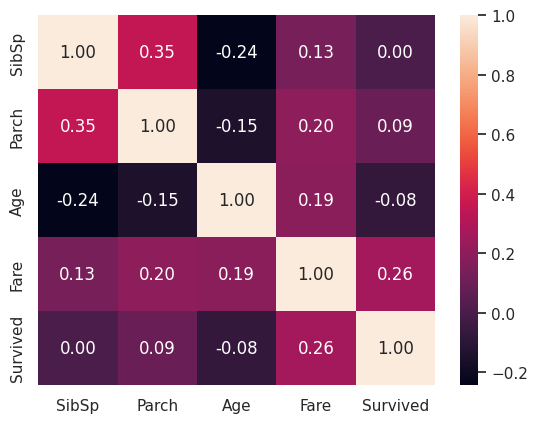

In [31]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

- Fare has the highest positive correlation with survival (0.26), suggesting that passengers who paid higher fares were more likely to survive.
- Parch (number of parents/children aboard) has a weak positive correlation with survival (0.09), indicating a slight tendency for passengers with more family members to survive.
- SibSp (number of siblings/spouses aboard) and Age show very weak and slightly negative correlations with survival, implying that these features have minimal impact on the likelihood of survival.

## SibSp / Survived
<a id = "13"></a>

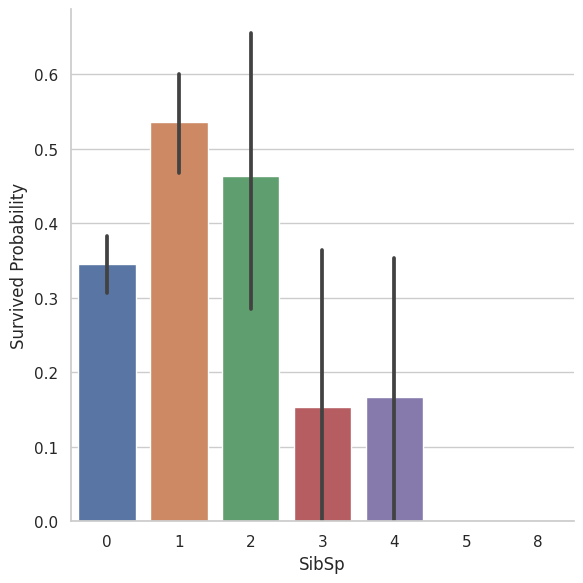

In [32]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

- Passengers with 1 sibling or spouse have the highest survival probability, around 0.55.
- Those with 2 siblings or spouses also have a relatively high survival probability, about 0.45.
- Passengers with no siblings or spouses have a moderate survival probability, approximately 0.3.
- Survival probabilities decrease significantly for passengers with 3 or more siblings or spouses, falling below 0.2.


Overall, having 1 or 2 siblings/spouses aboard appears to be associated with higher chances of survival, while having 3 or more significantly reduces survival probability. 

* You can create new features by splitting the "SibSp" variable into two groups: those with 2 or fewer siblings/spouses and those with more than 2. This approach can help in improving the model's performance by highlighting the significant difference in survival probabilities between these two groups. For instance, you can create a feature named "SibSp_2_or_less" for passengers with 2 or fewer siblings/spouses, and another feature named "SibSp_greater_than_2" for those with more than 2. This type of feature engineering can make it easier for the model to learn and utilize the distinct survival patterns associated with different family sizes.

## Parch / Survived
<a id = "14"></a>

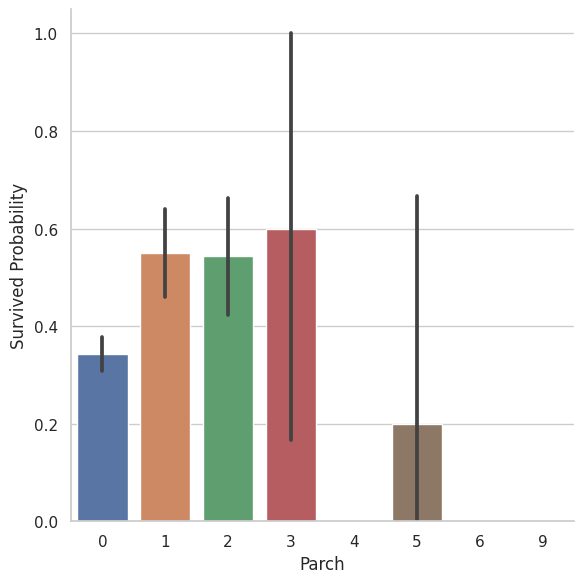

In [33]:
g = sns.catplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

- Parch = 1, 2, or 3: Passengers with 1, 2, or 3 parents/children aboard have the highest survival probabilities, around 0.5 to 0.6. However, it is important to note that the error bar for Parch = 3 is the longest among all groups. This indicates a high level of uncertainty or variability in the survival probability estimate for this group.
- Parch = 0: Passengers with no parents/children have a survival probability of about 0.3. The error bars are relatively moderate, suggesting a fair amount of confidence in this estimate.
- Parch = 4 or more: Passengers with 4 or more parents/children have significantly lower survival probabilities, below 0.2. The error bars for these groups are wide, indicating high variability and less confidence in these estimates.

- Sibsp and parch can be used for new feature extraction with th = 3
- Small familes have more chance to survive.
- There is a std in survival of passenger with parch = 3

## Pclass / Survived
<a id = "15"></a>

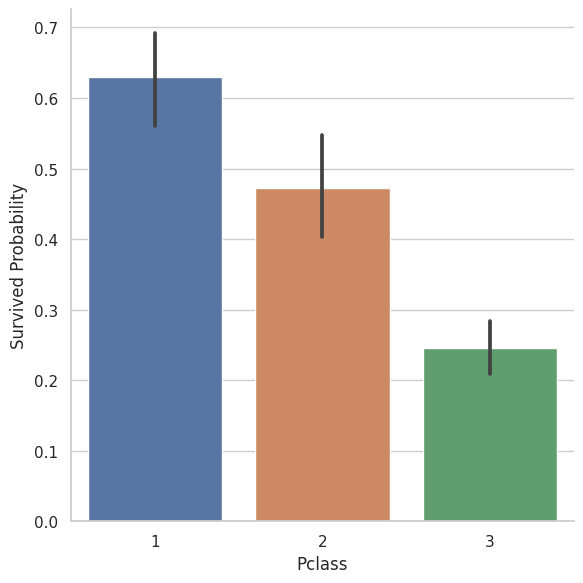

In [34]:
g = sns.catplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

## Age / Survived
<a id = "16"></a>

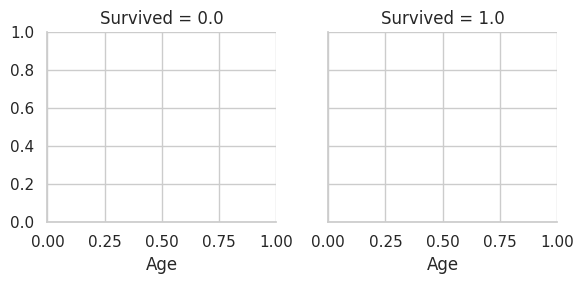

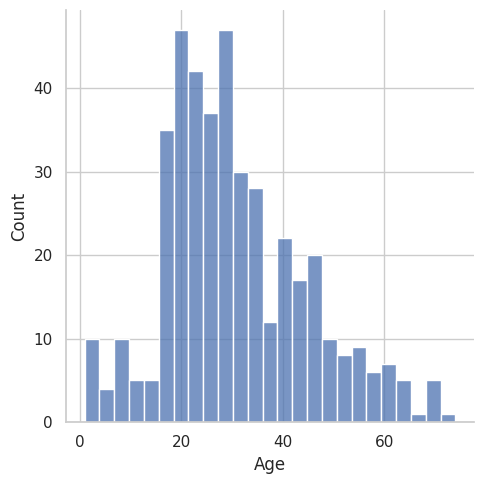

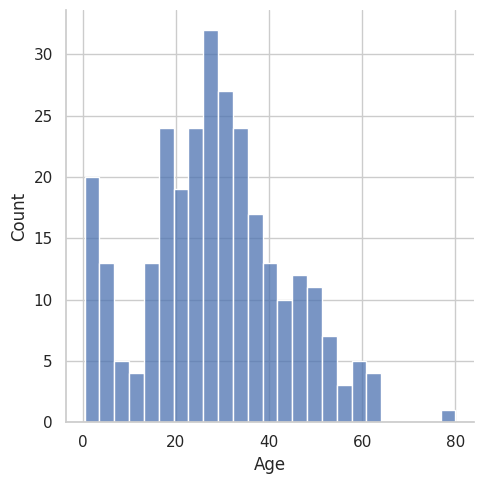

In [35]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.displot, "Age", bins = 25)
plt.show()

* **High Survival Rate for Children**: Passengers aged 10 and under had a high survival rate, as indicated by the higher density in the survival plot for this age group.
* **Oldest Passengers**: Notably, the oldest passengers, around age 80, also survived.
* **Young Adults**: A large number of passengers around the age of 20 did not survive, as shown by the pronounced peak in the non-surviving group.
* **Majority Age Range**: Most passengers were in the 15-35 age range, forming the largest demographic in both survival outcomes.
* **Age as a Feature**: Given the significant patterns observed, it is beneficial to use the age feature in training the model.
* **Handling Missing Values**: The age distribution can be utilized to impute missing age values, ensuring that the model leverages this important feature effectively.

## Pclass / Survived / Age
<a id = "17"></a>

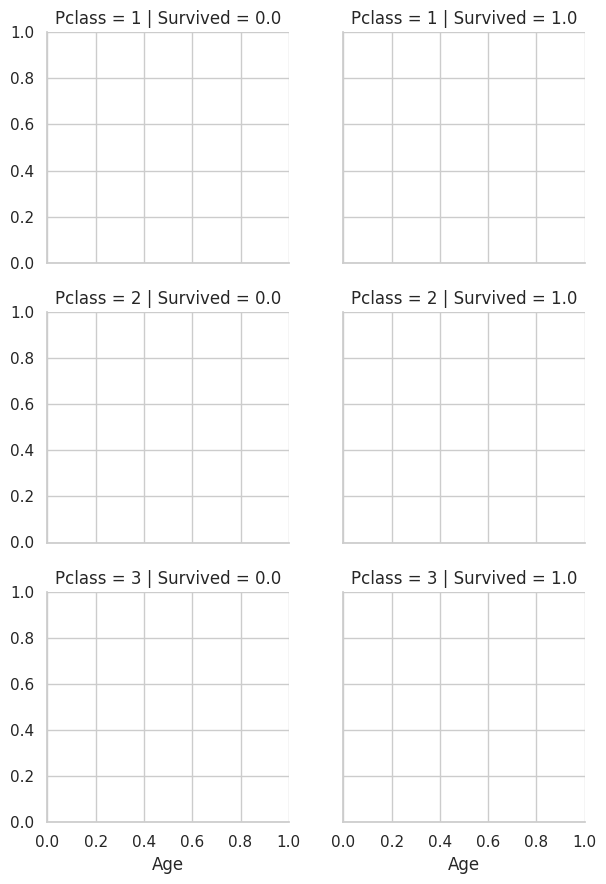

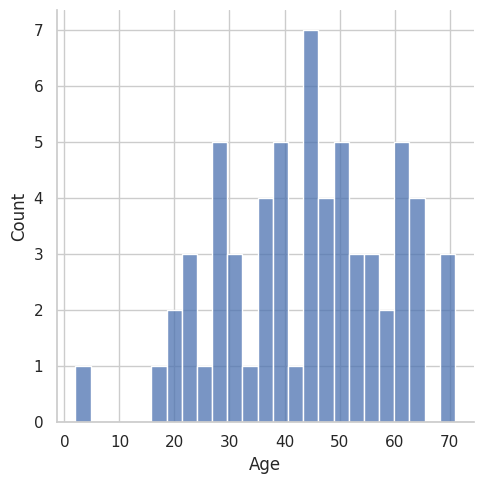

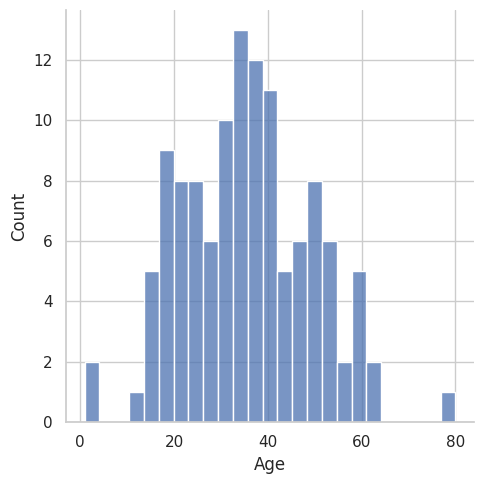

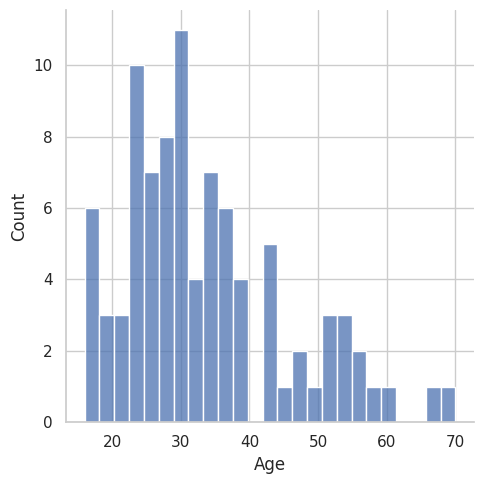

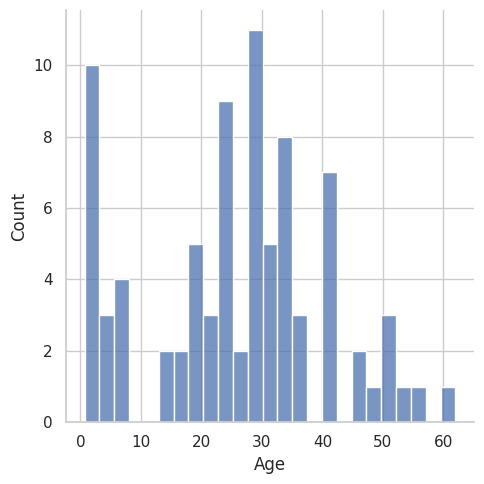

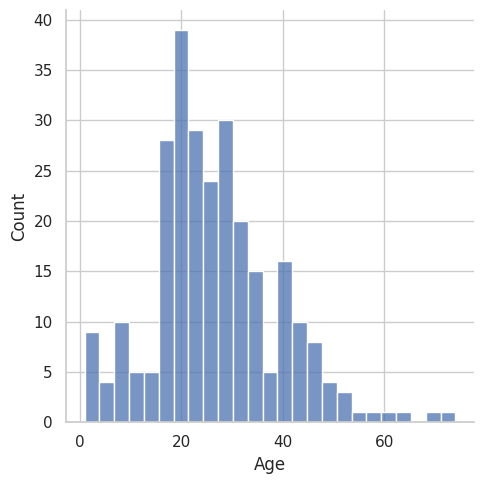

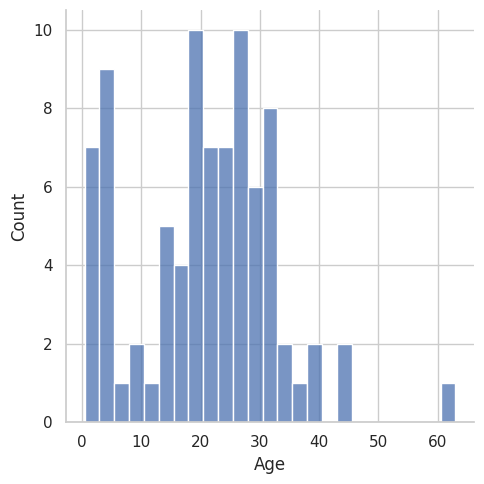

In [36]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", height = 3)
g.map(sns.displot, "Age", bins = 25)
g.add_legend()
plt.show()

* High Survival Rate for Children (0-10 years): Children had a higher survival rate across all classes, especially in third class.
* Low Survival Rate for Young Adults (20-35 years): Many young adults did not survive, with the highest number of non-survivors in third class.
* Better Survival for Middle-aged in First Class (35-50 years): Middle-aged passengers in first class had a higher survival rate compared to those in second and third class.
* Class-based Disparity for Older Adults (50+ years): Older adults in first class had a higher survival rate, whereas those in third class had significantly lower chances of survival.

## Embarked / Sex / Pclass / Survived
<a id = "18"></a>

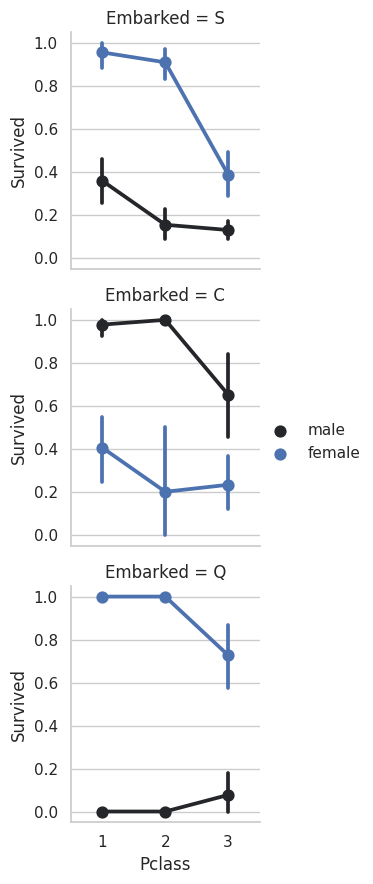

In [37]:
g = sns.FacetGrid(train_df, row = "Embarked", height = 3)
g.map(sns.pointplot, "Pclass" , "Survived", "Sex")
g.add_legend()
plt.show()

- Female passengers have much better survival rate than males.
- Males have better survival rate in pclass 3 in C.
- Embarked and sex will be used in training.

## Embarked / Sex / Fare / Survived
<a id = "19"></a>

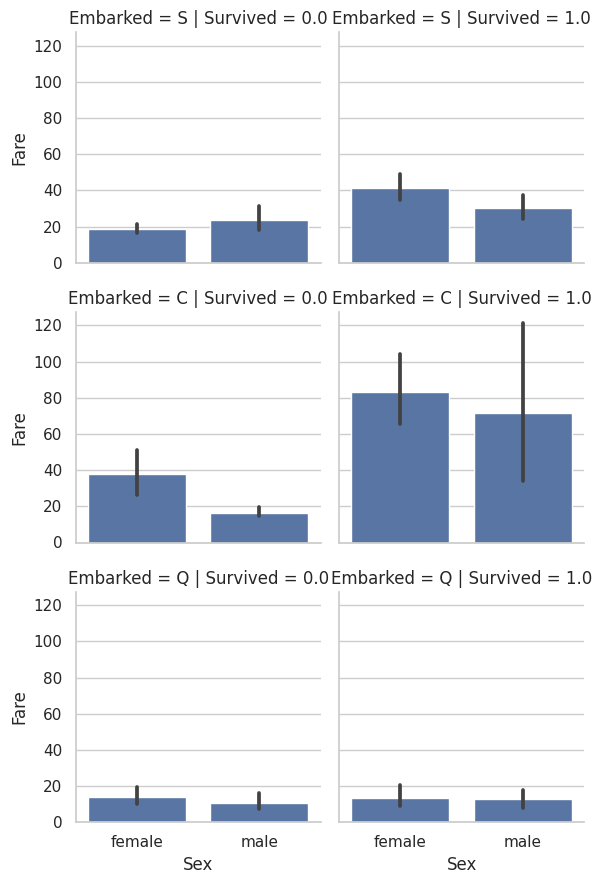

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", height = 3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

- Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

## Fill Missing: Age Feature
<a id = "20"></a>

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


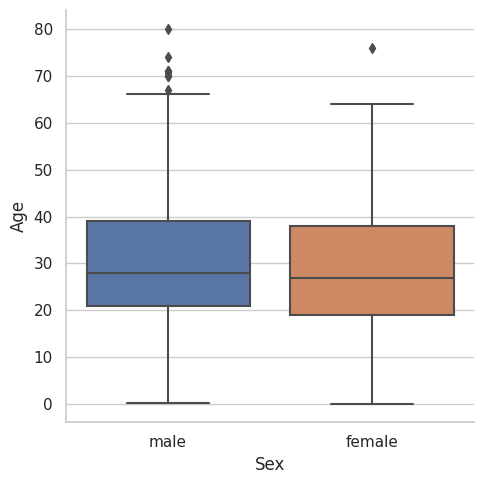

In [40]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

- Sex is not informative for age prediction, age distribution seems to be same.

- Let's take the example of Moran, Mr. James, the first ranked person in train_df with Age in NaN. In this graph, it is very difficult to guess the age of the person based on whether they are male or female.

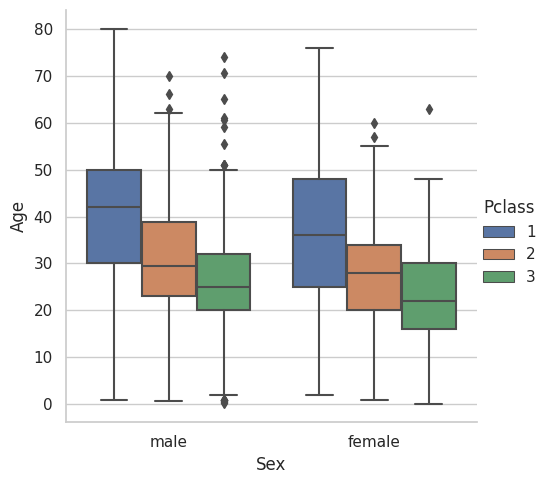

In [41]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass", data = train_df, kind = "box")
plt.show()

- 1st class passengers are older than 2nd, and 2nd is older than 3rd class. Pclass can be used to fill missing values in Age column.

- Again taking James as an example, we can infer from this graph that James is close to the median (25) since his Pclass is 3.

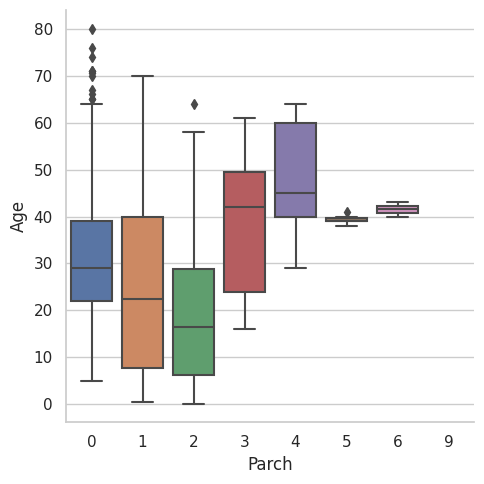

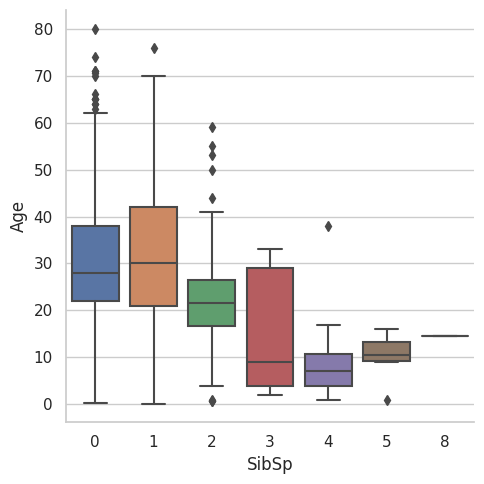

In [42]:
sns.catplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.catplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

- Since James' Parch and SibSp values are also 0, saying that his approximate age is close to 25 from these two graphs would not cause any distortion in the data set.

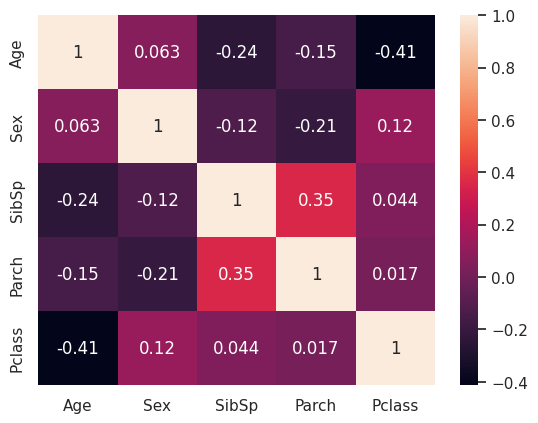

In [43]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

# Let's look at the correlation of these features.
sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

- As can be seen, Age is not correlated with sex but it is correlated with Parch, SibSp and Pclass.

In [44]:
# Store the indexes of rows with missing age values as a list
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

# Loop through each index with a missing age value
for i in index_nan_age:
    # Predict age based on the median age of passengers with the same SibSp, Parch, and Pclass
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & 
                                (train_df["Parch"] == train_df.iloc[i]["Parch"]) & 
                                (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    
    # Get the median age of the entire dataset
    age_med = train_df["Age"].median()
    
    # If a valid age prediction is found, fill the missing age with this value
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    # If no valid age prediction is found, fill the missing age with the overall median age
    else:
        train_df["Age"].iloc[i] = age_med

In [45]:
# Display the rows with missing age values to verify the filling process
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 8. Feature Engineering
<a id = "21"></a>

## Name / Title
<a id = "22"></a>

In [46]:
# We can investigate the relationship between passengers' titles and their survival.
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
# Extract the title from each full name in the "Name" column and add it to a new column
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[1].strip() for i in name]
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

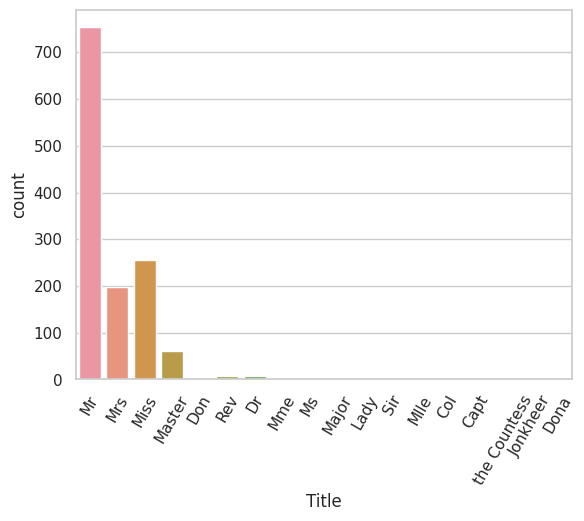

In [48]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [49]:
# Replace less common titles with "other", then encode titles as numeric values:
# 0 for "Master", 1 for "Miss", "Ms", "Mlle", or "Mrs", 2 for "Mr", and 3 for "other"
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(10)

0    2
1    1
2    1
3    1
4    2
5    2
6    2
7    0
8    1
9    1
Name: Title, dtype: int64

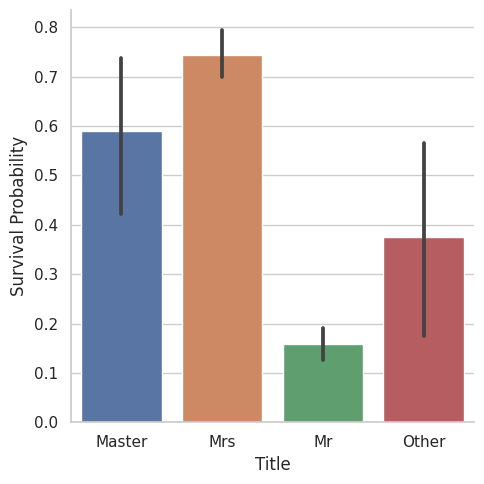

In [50]:
# Create a bar plot to show the relationship between titles and survival probability
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

- The bar plot shows that passengers with the title "Mrs" had the highest survival probability, followed by "Master" and "Other" titles. On the other hand, passengers with the title "Mr" had the lowest survival probability.

In [51]:
# We don't need "Name" column anymore
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [53]:
# Convert the "Title" column into dummy/one-hot encoded variables, creating separate columns for each title category
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


## Family Size
<a id = "23"></a>

In [54]:
# Create a new column "Fsize" to represent the family size by summing the number of siblings/spouses ("SibSp"), parents/children ("Parch"), and adding 1 to include the passenger themselves
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


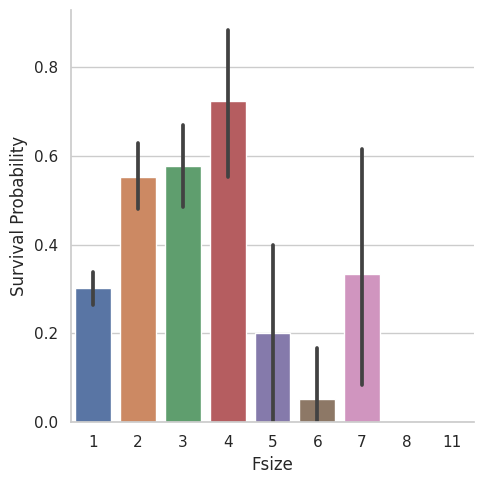

In [56]:
# Create a bar plot to show the relationship between family size and survival probability
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probability")
plt.show()

In [57]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


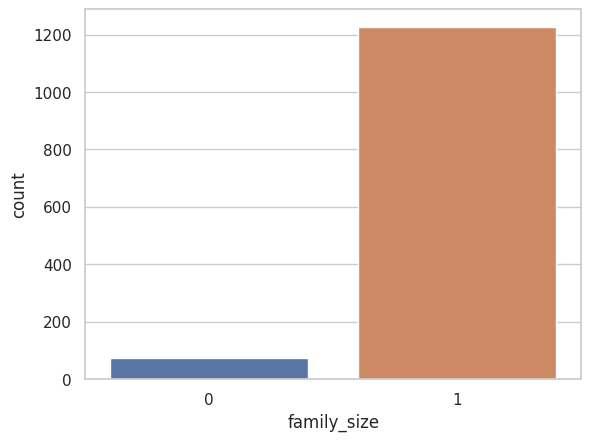

In [58]:
sns.countplot(x="family_size", data=train_df)
plt.show()

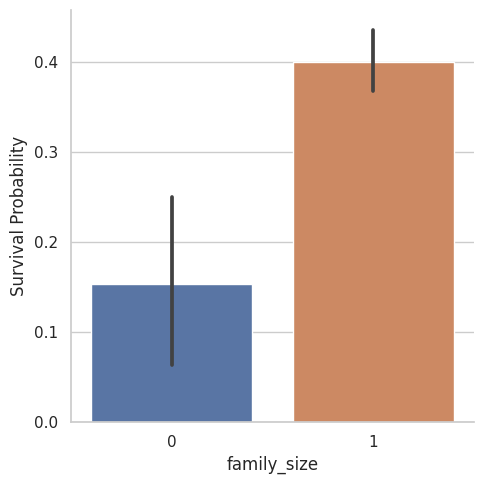

In [59]:
g = sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probability")
plt.show()

- It shows that passengers with a family size of 4 or fewer had the highest survival probability, while those with very large family sizes (5 and above) had much lower survival probabilities. This could suggest that having a moderately sized family (but not too large) was more advantageous for survival.

In [60]:
train_df = pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


## Embarked
<a id = "24"></a>


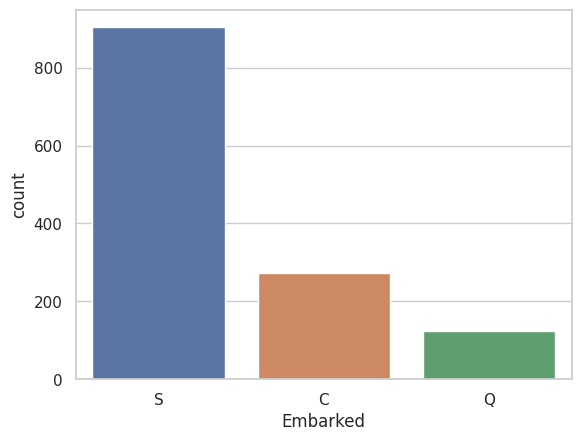

In [61]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [62]:
train_df = pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


## Ticket
<a id = "25"></a>

In [63]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [64]:
# Extract the prefix from tickets if it contains non-numeric characters.
# If the ticket is purely numeric, assign it a placeholder "x".
# The prefixes are cleaned by removing dots, slashes, and any leading/trailing spaces.
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [65]:
train_df["Ticket"]

0            A5
1            PC
2        STONO2
3             x
4             x
         ...   
1294         A5
1295         PC
1296    SOTONOQ
1297          x
1298          x
Name: Ticket, Length: 1299, dtype: object

In [66]:
# Convert the cleaned "Ticket" prefixes into dummy/one-hot encoded variables with a "T" prefix for each new column
train_df = pd.get_dummies(train_df,columns=["Ticket"], prefix = "T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,0,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,0,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True


## Pclass
<a id = "26"></a>

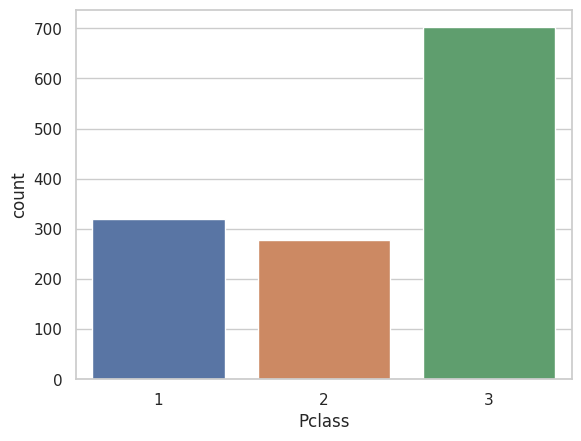

In [67]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [68]:
# This code converts the "Pclass" column to a categorical type and then creates one-hot encoded columns for each class category with the prefix "T" for use in the model.
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df,columns=["Pclass"], prefix = "T")
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,T_1,T_2,T_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,1,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


## Sex
<a id = "27"></a>

In [69]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,T_1,T_2,T_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


## Drop Passenger ID and Cabin
<a id = "28"></a>

In [70]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [71]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'T_1', 'T_2',
       'T_3', 'Sex_0', 'Sex_1'],
      dtype='object')

# Modeling
<a id = "29"></a>

In [72]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train - Test Split
<a id = "30"></a>

In [73]:
train_df_len

881

In [74]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,T_1,T_2,T_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
882,47.0,1,0,7.0000,False,True,False,False,2,False,...,False,False,False,False,True,False,False,True,True,False
883,62.0,0,0,9.6875,False,False,True,False,1,False,...,False,False,False,False,True,False,True,False,False,True
884,27.0,0,0,8.6625,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
885,22.0,1,1,12.2875,False,True,False,False,3,False,...,False,False,False,False,True,False,False,True,True,False


In [75]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

In [76]:
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))
print("test: ",len(test))

X_train:  590
X_test:  291
y_train:  590
y_test:  291
test:  418


The bunch of code above performs the following tasks:

- Splitting Back: After preprocessing, it splits the combined dataset back into train and test sets. The test set is separated by using the original training data length, and the Survived column is dropped from the test set since it is the target variable.

- Train-Test Split: The training data is further split into X_train, X_test, y_train, and y_test using train_test_split with 33% of the data reserved for testing. This split allows for model validation and hyperparameter tuning.

- Print Lengths: Finally, it prints the lengths of the training and testing datasets to verify the split.

## Simple Logistic Regression
<a id = "31"></a>

In [77]:
# Initializing the Logistic Regression model and training accuracies
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.1


- The training accuracy (82.71%) and testing accuracy (81.1%) are quite close to each other, indicating that the model has learned well from the training data and is able to generalize this learning effectively to the test data. This suggests that the model is not overfitting, meaning it hasn't simply memorized the training data but has captured a general pattern that it can apply to new, unseen data. Overall, these results indicate that the model is performing well and is likely to make reasonably accurate predictions on real-world data.

## Hyperparameter Tuning -- Grid Search -- Cross Validation
<a id = "32"></a>
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [78]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state, max_iter=1000),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

1. Random State: The variable random_state = 42 is set to ensure reproducibility, so that results can be consistently reproduced every time the code is run.

2. Classifier List: The classifier list contains different machine learning models that will be trained and tested:

    * DecisionTreeClassifier
    * SVC (Support Vector Classifier)
    * RandomForestClassifier
    * LogisticRegression
    * KNeighborsClassifier


3. Parameter Grids: For each classifier, a corresponding dictionary (param_grid) is defined, which specifies the hyperparameters that will be tuned during the model optimization process:

    * dt_param_grid for DecisionTreeClassifier includes parameters like min_samples_split and max_depth.
    * svc_param_grid for SVC includes kernel, gamma, and C.
    * rf_param_grid for RandomForestClassifier includes max_features, min_samples_split, min_samples_leaf, bootstrap, n_estimators, and criterion.
    * logreg_param_grid for LogisticRegression includes C and penalty.
    * knn_param_grid for KNeighborsClassifier includes n_neighbors, weights, and metric.


4. Classifier Parameters: The classifier_param list aggregates all the parameter grids, which will be used to perform hyperparameter tuning for each classifier.

This setup is typically used for performing grid search or another hyperparameter optimization technique to find the best parameters for each model, thereby improving the model's performance.

In [79]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])
    print("**********************************")

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
**********************************
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
**********************************
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
**********************************
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8220338983050846
**********************************
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7813559322033898
**********************************


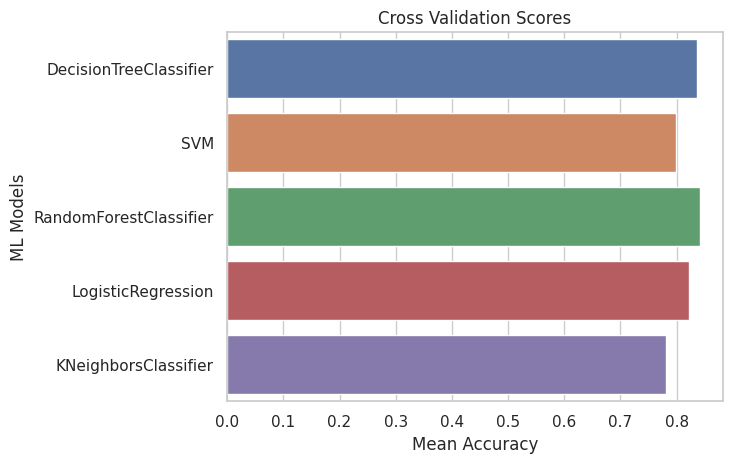

In [80]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier", "LogisticRegression", "KNeighborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y="ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

## Ensemble Modeling
<a id = "33"></a>

- Based on the cross-validation results, where a threshold of 0.8 was chosen, an ensemble model was built using the VotingClassifier. The selected models for the ensemble are:

   * DecisionTreeClassifier (dt): The first model from the cross-validation list.
   * RandomForestClassifier (rfc): The third model from the cross-validation list.
   * LogisticRegression (lr): The fourth model from the cross-validation list.

- These models were included in the ensemble because they either met or were close to the 0.8 accuracy threshold.

- The VotingClassifier was set to use soft voting, which means it averages the predicted probabilities from the individual models to make a final prediction. The ensemble was then trained on the training data (X_train, y_train), and its accuracy was evaluated on the test data (X_test, y_test).

- The final accuracy score, printed out at the end, indicates how well the ensemble model performs on the unseen test data. This approach leverages the strengths of multiple models to potentially achieve better generalization and performance compared to any single model.

In [81]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8144329896907216


## Prediction and Submission
<a id = "34"></a>

In [82]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

- If you like it, thank you for you ***upvotes***.
- If you have any question, I will happy to hear it